# Breast Cancer Classifier

In this project, we will be using several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict whether a patient has breast cancer.

#### Explore the data

In [10]:
# Load the data from sklearn library
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
# Examine data
print("First data point:", breast_cancer_data.data[0])
print("Feature names:", breast_cancer_data.feature_names)
print("Classification labels:", breast_cancer_data.target)
print("Classification names:", breast_cancer_data.target_names)

First data point: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Classification labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0

#### Splitting the data into Training and Validation Sets

In [11]:
# Importing library
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data,breast_cancer_data.target, test_size=0.2, random_state=100)

Let’s confirm that worked correctly. *training_data* and *training_labels* should be the same size - one label for every piece of data!

In [12]:
print(len(training_data), len(training_labels))

455 455


#### Classifier

Now that we’ve created training and validation sets, we can create a KNeighborsClassifier and test its accuracy. 

In [14]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier
# Setting classifier with k=3
classifier = KNeighborsClassifier(n_neighbors=3)
# Train classifier
classifier.fit(training_data,training_labels)

KNeighborsClassifier(n_neighbors=3)

Now that the classifier has been trained, let’s find how accurate it is on the validation set.

In [15]:
# Finding classifier score
print("Classifier score:", classifier.score(validation_data,validation_labels))

Classifier score: 0.9473684210526315


Let's check if there is a *k* value with better score.

In [64]:
# Finding optimal k value
scores_list=[]
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data,training_labels)
    scores_list.append(classifier.score(validation_data,validation_labels))
k_list=range(1,101)
scores_and_k = list(zip(scores_list,k_list))
print("Max score, k:", max(scores_and_k))


Max score, k: (0.9649122807017544, 56)


#### Graphing the results

We now have the validation accuracy for 100 different k's. Let's visualize them.

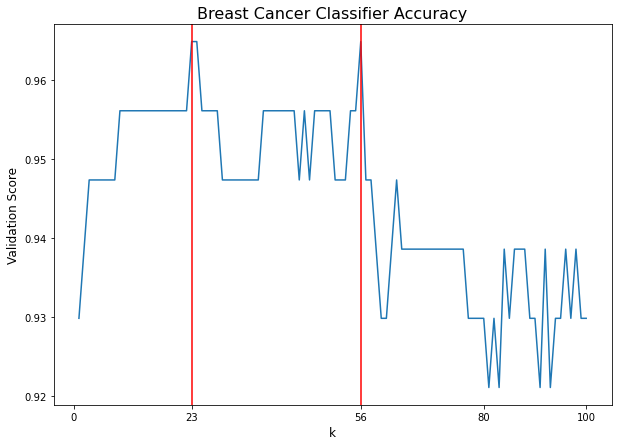

In [81]:
# Import matlab library
import matplotlib.pyplot as plt

# Plotting chart of out k's and validation scores
plt.figure(figsize = (10,7))
plt.plot(k_list,scores_list)
plt.xlabel("k", size =12)
plt.ylabel("Validation Score",size=12)
plt.title("Breast Cancer Classifier Accuracy", size =16)
plt.axvline(56, color='red')
plt.axvline(23, color='red')
plt.xticks([0,23,56,80,100],['0','23','56','80','100'])
plt.show()
plt.close()


### Conclusion

Maximal classifier accuracy is 0.9649122807017544 and is achieved at k values of 23,24 and 56.